In [44]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [45]:
import pandas as pd
import plotly.express as px
import numpy as np

import plotly.io as pio
pio.renderers.default = "svg"

In [46]:
dataset = pd.read_excel('src/get_around_delay_analysis.xlsx')

# 1/ Some statistics

In [47]:
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 21310

Display of dataset: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN



Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

Let's have a look at the distribution of delay_at_checkout_in_minutes. According to the basics statistics, there are some outliers (max at 71084 with mean at 59.7 and std at 1002.6). So I decide to remove the outliers for the graph.

In [48]:
to_keep = (dataset['delay_at_checkout_in_minutes'] <= dataset['delay_at_checkout_in_minutes'].mean() + 3*dataset['delay_at_checkout_in_minutes'].std()) \
        & (dataset['delay_at_checkout_in_minutes'] >= dataset['delay_at_checkout_in_minutes'].mean() - 3*dataset['delay_at_checkout_in_minutes'].std())

dataset_temp = dataset.loc[to_keep,:]

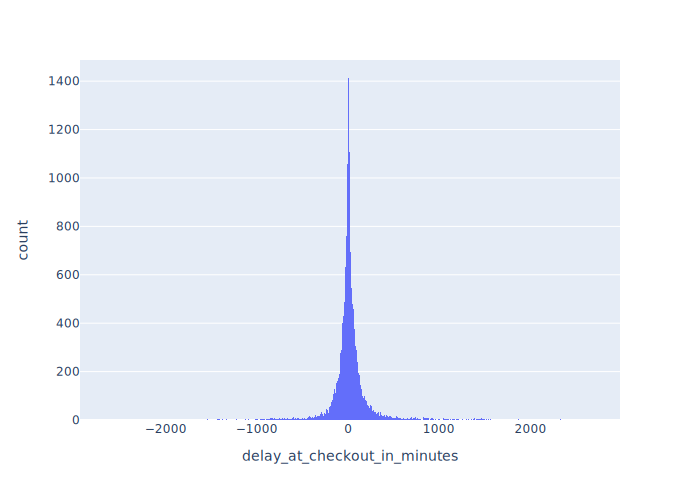

In [49]:
px.histogram(dataset_temp, x = 'delay_at_checkout_in_minutes', nbins = 1000)

The delay_at_checkout_in_minutes has a very nice gaussian distribution.  

Furthermore, the previous_ended_rental_id has 91% of missing values. We can assume that these rentals are sufficiently isolated in time not to be concerned by the problems of successive rentals.  
Therefore, I choose to keep only rows with previous rentals identified for the further analyses.

# 2/ Working on rentals that have previous rentals

In [50]:
mask = (dataset['previous_ended_rental_id'].isnull() == False)
df_previous = dataset[mask].copy()

In [51]:
print("Number of rows : {}".format(df_previous.shape[0]))
print()

print("Display of dataset: ")
display(df_previous.head())
print()

print("Basics statistics: ")
data_desc = df_previous.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df_previous.isnull().sum()/df_previous.shape[0])

Number of rows : 1841

Display of dataset: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
6,511639,370585,connect,ended,-15.0,563782.0,570.0
19,519491,312389,mobile,ended,58.0,545639.0,420.0
23,521156,392479,mobile,ended,NaN,537298.0,0.0
34,525044,349751,mobile,ended,NaN,510607.0,60.0
40,528808,181625,connect,ended,-76.0,557404.0,330.0



Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,1841.000000,1841.000000,1841,1841,1515.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,1028,1612,NaN,NaN,NaN
mean,552319.382944,351416.066812,NaN,NaN,27.529373,550127.411733,279.288430
std,12878.176525,55088.090162,NaN,NaN,433.981187,13184.023111,254.594486
min,505560.000000,159533.000000,NaN,NaN,-2676.000000,505628.000000,0.000000
25%,543679.000000,324821.000000,NaN,NaN,-47.000000,540896.000000,60.000000
50%,552380.000000,368132.000000,NaN,NaN,4.000000,550567.000000,180.000000
75%,562480.000000,392241.000000,NaN,NaN,54.000000,560823.000000,540.000000



Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  17.707768
previous_ended_rental_id                       0.000000
time_delta_with_previous_rental_in_minutes     0.000000
dtype: float64

There are only 1841 rentals which could be affected by the problem of late checkout, compared to the initial 21 310 rentals.

## Completing the dataset

In [52]:
# for one rental, get the delay_at_checkout_in_minutes and checkin_type of the previous rental
def get_previous_info(r_id) :
    previous_index = dataset['rental_id'].loc[lambda x: x==r_id].index[0]
    return [dataset.loc[previous_index,'delay_at_checkout_in_minutes'], dataset.loc[previous_index,'checkin_type']]

In [53]:
get_previous_info(549535)

[-68.0, 'connect']

In [54]:
# adding columns to the dataset to get information about the previous rental
df_previous['previous_delay_at_checkout_in_minutes'],  df_previous['previous_checkin_type'] = zip(*df_previous['previous_ended_rental_id'].apply(get_previous_info))

In [55]:
df_previous

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_delay_at_checkout_in_minutes,previous_checkin_type
6,511639,370585,connect,ended,-15.0,563782.0,570.0,136.0,connect
19,519491,312389,mobile,ended,58.0,545639.0,420.0,140.0,mobile
23,521156,392479,mobile,ended,NaN,537298.0,0.0,NaN,mobile
34,525044,349751,mobile,ended,NaN,510607.0,60.0,-113.0,mobile
40,528808,181625,connect,ended,-76.0,557404.0,330.0,-352.0,connect
...,...,...,...,...,...,...,...,...,...
21269,568049,381499,connect,canceled,NaN,562174.0,720.0,73.0,connect
21272,568241,396409,mobile,canceled,NaN,566136.0,570.0,16.0,mobile
21275,568523,297973,mobile,ended,12.0,567121.0,240.0,-275.0,mobile
21286,569717,377312,mobile,ended,230.0,545045.0,90.0,22.0,mobile


In [56]:
#  adding columns to see if late for the check-in : if previous_delay_at_checkout_in_minutes > time_delta_with_previous_rental_in_minutes

df_previous['delay_checkin'] = df_previous['previous_delay_at_checkout_in_minutes'] - df_previous['time_delta_with_previous_rental_in_minutes']
df_previous['late_checkin'] = df_previous['delay_checkin'].apply(lambda x : 1 if x > 0 else 0)

In [57]:
df_previous

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_delay_at_checkout_in_minutes,previous_checkin_type,delay_checkin,late_checkin
6,511639,370585,connect,ended,-15.0,563782.0,570.0,136.0,connect,-434.0,0
19,519491,312389,mobile,ended,58.0,545639.0,420.0,140.0,mobile,-280.0,0
23,521156,392479,mobile,ended,NaN,537298.0,0.0,NaN,mobile,NaN,0
34,525044,349751,mobile,ended,NaN,510607.0,60.0,-113.0,mobile,-173.0,0
40,528808,181625,connect,ended,-76.0,557404.0,330.0,-352.0,connect,-682.0,0
...,...,...,...,...,...,...,...,...,...,...,...
21269,568049,381499,connect,canceled,NaN,562174.0,720.0,73.0,connect,-647.0,0
21272,568241,396409,mobile,canceled,NaN,566136.0,570.0,16.0,mobile,-554.0,0
21275,568523,297973,mobile,ended,12.0,567121.0,240.0,-275.0,mobile,-515.0,0
21286,569717,377312,mobile,ended,230.0,545045.0,90.0,22.0,mobile,-68.0,0


## Proportions of canceled rentals

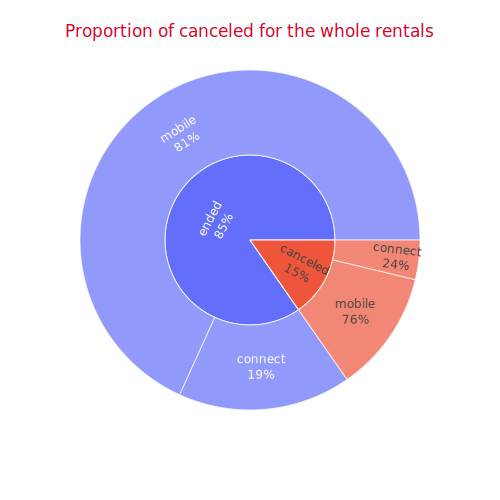

In [58]:
# proportion of canceled rentals for the whole rentals
fig = px.sunburst(pd.DataFrame(dataset.groupby(['state', 'checkin_type'], as_index=False).size()),
                    path = ['state', 'checkin_type'],
                    values='size',
                )
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title={'text': "Proportion of canceled for the whole rentals", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    autosize=False,
                    height=500,
                    width=500,
                    title_font_color="#D50425")
fig.show()

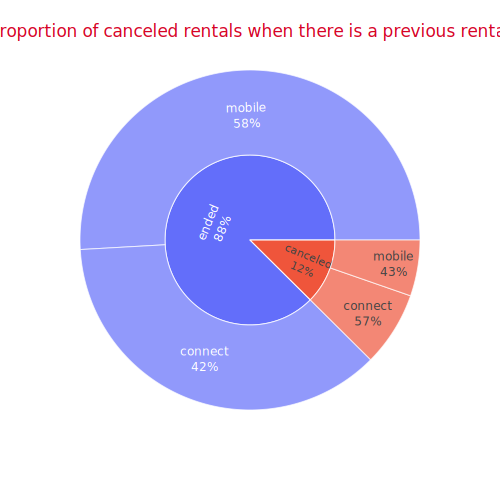

In [59]:
# proportion of canceled rentals when there is a previous rental
fig = px.sunburst(pd.DataFrame(df_previous.groupby(['state', 'previous_checkin_type'], as_index=False).size()),
            path = ['state', 'previous_checkin_type'],
            values='size',
            )
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title={'text': "Proportion of canceled rentals when there is a previous rental", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    autosize=False,
                    height=500,
                    width=500,
                    title_font_color="#D50425")
fig.show()

We can see that the proportion of canceled rentals does not increase when there is a previous rental, it even decreases : 12 % compared to 15 %. But we have very few rows for the rentals with previous rentals.  
There is not much effect of check-in type of the previous rental.

In [60]:
# proportion of late checkin for rentals when there is a previous rental
mask = df_previous['late_checkin'] == 1
df_previous[mask].shape[0] / df_previous.shape[0]

0.11841390548614883

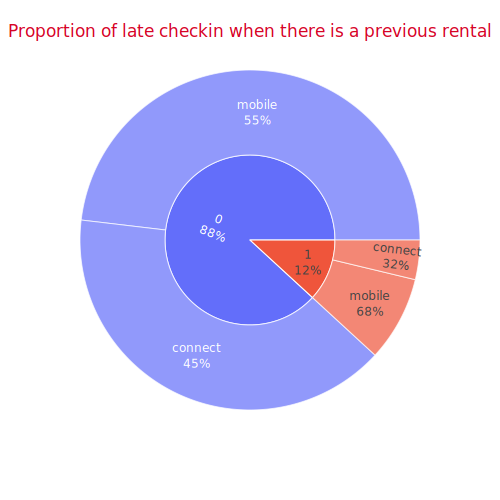

In [61]:
# proportion of late checkin when there is a previous rental
fig = px.sunburst(pd.DataFrame(df_previous.groupby(['late_checkin', 'previous_checkin_type'], as_index=False).size()),
            path = ['late_checkin', 'previous_checkin_type'],
            values='size',
            )
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title={'text': "Proportion of late checkin when there is a previous rental", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    autosize=False,
                    height=500,
                    width=500,
                    title_font_color="#D50425")
fig.show()

The proportion of mobile check-in type for the previous rental increases when there is late check-in.  
The proportion of late checkin is at 12 % for rentals with previous rentals. Let's see if the proportion of canceled rentals (initial value of 12%) increases when the checkin is late, that is when the previous driver made a late checkout.

In [62]:
mask = df_previous['late_checkin'] == 1
df_late = df_previous[mask].copy()

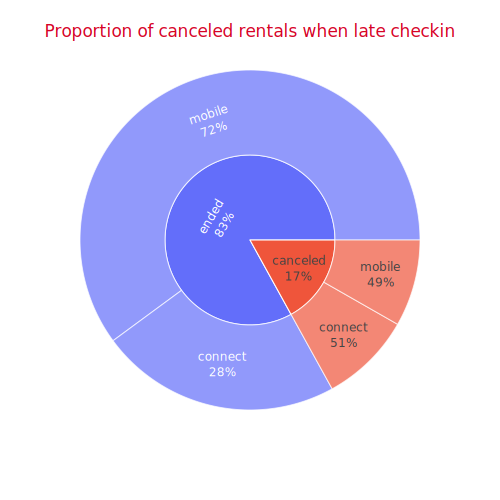

In [63]:
# proportion of canceled rentals when late checkin
fig = px.sunburst(pd.DataFrame(df_late.groupby(['state', 'checkin_type'], as_index=False).size()),
            path = ['state', 'checkin_type'],
            values='size',
            )
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title={'text': "Proportion of canceled rentals when late checkin", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    autosize=False,
                    height=500,
                    width=500,
                    title_font_color="#D50425")
fig.show()

The proportion increases to 17%, so there is an effect of late checkin on the cancellation of rentals.  
In addition, canceled rentals occur more often when the rental has a connect check-in type.

As a conclusion, when a driver is late for checkout, the risk for cancellation of the next rental increases.  
People are more late when they use the mobile check-in type.  
The risk for cancellation of a rental when the previous driver is late increases when connect check-in is used.

## Distribution of time_delta_with_previous_rental_in_minutes

In [64]:
df_temp = df_previous.groupby(['time_delta_with_previous_rental_in_minutes', 'checkin_type'], as_index = False).sum()

/tmp/ipykernel_29233/700159761.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [65]:
df_temp

,time_delta_with_previous_rental_in_minutes,checkin_type,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,previous_delay_at_checkout_in_minutes,delay_checkin,late_checkin
0,0.0,connect,72482942,45624940,-2116.0,72270057.0,-8189.0,-8189.0,40
1,0.0,mobile,81559003,52831025,12615.0,81086818.0,1291.0,1291.0,76
2,30.0,connect,27521627,16480187,-1314.0,27599181.0,-2559.0,-4059.0,8
3,30.0,mobile,39784958,25412336,2651.0,39484110.0,352.0,-1748.0,22
4,60.0,connect,43762815,27629410,-2135.0,43616287.0,-8392.0,-12892.0,8
5,60.0,mobile,57114481,37582655,4898.0,56907941.0,-6365.0,-12005.0,18
6,90.0,connect,19484071,11494455,-833.0,19288644.0,-1199.0,-4349.0,3
7,90.0,mobile,25912461,17176458,15738.0,25668027.0,-146.0,-4196.0,5
8,120.0,connect,27426852,17129808,-1431.0,27347365.0,-6036.0,-12036.0,3
9,120.0,mobile,48002259,30832985,2167.0,47771976.0,2123.0,-7837.0,9


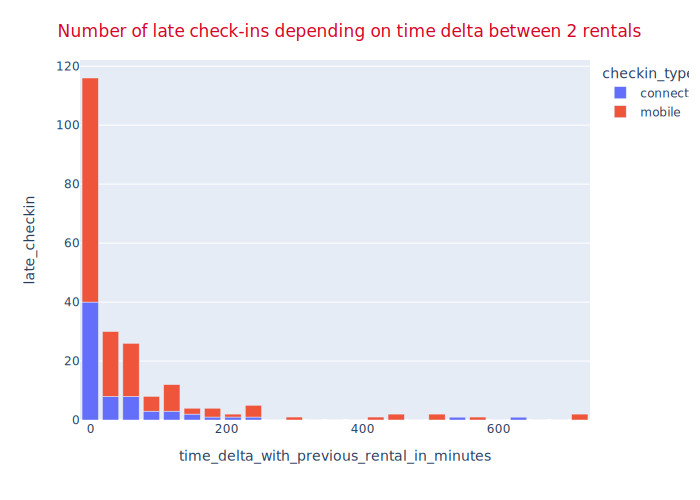

In [66]:
fig = px.bar(df_temp, x = 'time_delta_with_previous_rental_in_minutes', y = 'late_checkin', color = 'checkin_type')
fig.update_layout(title={'text': "Number of late check-ins depending on time delta between 2 rentals", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    title_font_color="#D50425")
fig.show()

We can see that the time_delta_with_previous_rental_in_minutes goes from 0 up to 720 min. Let's study what could be the impacts of a threshold.

## Impacts with thresholds from 0 to 720 min

In [67]:
thresholds = list(range(0, 750, 30))
thresholds

[0,
 30,
 60,
 90,
 120,
 150,
 180,
 210,
 240,
 270,
 300,
 330,
 360,
 390,
 420,
 450,
 480,
 510,
 540,
 570,
 600,
 630,
 660,
 690,
 720]

In [68]:
def checkin_solved(previous_delay, threshold, state, late_next_checkin) :      # determine if the rental was canceled when there is late previous checkout and if it will be solved with the threshold
    if (late_next_checkin == 1) & (state == 'canceled') & (previous_delay < threshold) :
        return 1
    else :
        return 0

In [69]:
def late_solved(previous_delay, threshold, late_next_checkin) :      # determine if the rental was in danger due to late previous checkout and if it will be solved with the threshold
    if (late_next_checkin == 1) & (previous_delay < threshold) :
        return 1
    else :
        return 0

In [70]:
for item in thresholds :
    df_previous[f'threshold_{item}'] = df_previous['time_delta_with_previous_rental_in_minutes'].apply(lambda x : 1 if x < item else 0) # no effect if the time delta is less than the threshold
    df_previous[f'checkin_solved_{item}'] = list(map(checkin_solved, df_previous['previous_delay_at_checkout_in_minutes'], [item] * df_previous.shape[0], df_previous['state'], df_previous['late_checkin'])) # find canceled rentals that would be solved with the threshold
    df_previous[f'late_solved_{item}'] = list(map(late_solved, df_previous['previous_delay_at_checkout_in_minutes'], [item] * df_previous.shape[0], df_previous['late_checkin'])) # find late rentals that would be solved with the threshold

In [71]:
df_previous

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_delay_at_checkout_in_minutes,previous_checkin_type,delay_checkin,...,late_solved_630,threshold_660,checkin_solved_660,late_solved_660,threshold_690,checkin_solved_690,late_solved_690,threshold_720,checkin_solved_720,late_solved_720
6,511639,370585,connect,ended,-15.0,563782.0,570.0,136.0,connect,-434.0,...,0,1,0,0,1,0,0,1,0,0
19,519491,312389,mobile,ended,58.0,545639.0,420.0,140.0,mobile,-280.0,...,0,1,0,0,1,0,0,1,0,0
23,521156,392479,mobile,ended,NaN,537298.0,0.0,NaN,mobile,NaN,...,0,1,0,0,1,0,0,1,0,0
34,525044,349751,mobile,ended,NaN,510607.0,60.0,-113.0,mobile,-173.0,...,0,1,0,0,1,0,0,1,0,0
40,528808,181625,connect,ended,-76.0,557404.0,330.0,-352.0,connect,-682.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21269,568049,381499,connect,canceled,NaN,562174.0,720.0,73.0,connect,-647.0,...,0,0,0,0,0,0,0,0,0,0
21272,568241,396409,mobile,canceled,NaN,566136.0,570.0,16.0,mobile,-554.0,...,0,1,0,0,1,0,0,1,0,0
21275,568523,297973,mobile,ended,12.0,567121.0,240.0,-275.0,mobile,-515.0,...,0,1,0,0,1,0,0,1,0,0
21286,569717,377312,mobile,ended,230.0,545045.0,90.0,22.0,mobile,-68.0,...,0,1,0,0,1,0,0,1,0,0


In [72]:
df_temp = df_previous.groupby(['checkin_type'], as_index=False).sum()

/tmp/ipykernel_29233/575619679.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [73]:
df_temp

,checkin_type,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_delay_at_checkout_in_minutes,delay_checkin,late_checkin,threshold_0,...,late_solved_630,threshold_660,checkin_solved_660,late_solved_660,threshold_690,checkin_solved_690,late_solved_690,threshold_720,checkin_solved_720,late_solved_720
0,connect,449453787,278821634,-24018.0,448417182.0,233880.0,-58062.0,-284232.0,69,0,...,67,692,18,68,723,18,68,755,18,68
1,mobile,567366197,368135345,65725.0,564367383.0,280290.0,15249.0,-236571.0,149,0,...,139,882,17,139,923,17,139,956,17,139


In [74]:
df_temp.loc[2,:] = df_temp.iloc[0,:] + df_temp.iloc[1,:]
df_temp.loc[2,'checkin_type'] = 'connect + mobile'

In [75]:
df_temp

,checkin_type,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_delay_at_checkout_in_minutes,delay_checkin,late_checkin,threshold_0,...,late_solved_630,threshold_660,checkin_solved_660,late_solved_660,threshold_690,checkin_solved_690,late_solved_690,threshold_720,checkin_solved_720,late_solved_720
0,connect,4.494538e+08,278821634.0,-24018.0,4.484172e+08,233880.0,-58062.0,-284232.0,69.0,0.0,...,67.0,692.0,18.0,68.0,723.0,18.0,68.0,755.0,18.0,68.0
1,mobile,5.673662e+08,368135345.0,65725.0,5.643674e+08,280290.0,15249.0,-236571.0,149.0,0.0,...,139.0,882.0,17.0,139.0,923.0,17.0,139.0,956.0,17.0,139.0
2,connect + mobile,1.016820e+09,646956979.0,41707.0,1.012785e+09,514170.0,-42813.0,-520803.0,218.0,0.0,...,206.0,1574.0,35.0,207.0,1646.0,35.0,207.0,1711.0,35.0,207.0


In [76]:
df_temp = pd.melt(df_temp, id_vars=['checkin_type'], var_name='impacts', value_name='nb_affected')

In [77]:
df_temp

,checkin_type,impacts,nb_affected
0,connect,rental_id,4.494538e+08
1,mobile,rental_id,5.673662e+08
2,connect + mobile,rental_id,1.016820e+09
3,connect,car_id,2.788216e+08
4,mobile,car_id,3.681353e+08
...,...,...,...
244,mobile,checkin_solved_720,1.700000e+01
245,connect + mobile,checkin_solved_720,3.500000e+01
246,connect,late_solved_720,6.800000e+01
247,mobile,late_solved_720,1.390000e+02


In [78]:
# select only the total cases that would be impacted by a threshold
df_temp_total = df_temp[df_temp['impacts'].str.contains('threshold', case=False, regex=False)].copy()
df_temp_total['thresholds'] = df_temp_total['impacts'].apply(lambda x : x.split('_')[1])
df_temp_total

,checkin_type,impacts,nb_affected,thresholds
24,connect,threshold_0,0.0,0
25,mobile,threshold_0,0.0,0
26,connect + mobile,threshold_0,0.0,0
33,connect,threshold_30,131.0,30
34,mobile,threshold_30,148.0,30
...,...,...,...,...
232,mobile,threshold_690,923.0,690
233,connect + mobile,threshold_690,1646.0,690
240,connect,threshold_720,755.0,720
241,mobile,threshold_720,956.0,720


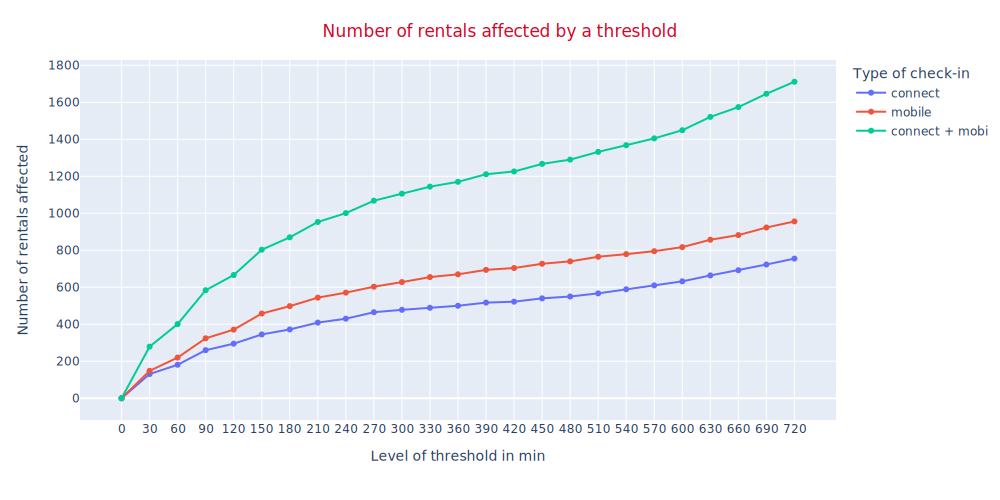

In [79]:
fig = px.line(df_temp_total, x = 'thresholds', y = 'nb_affected',
                markers = True,
                color = 'checkin_type'
            )
fig.update_layout(yaxis_title='Number of rentals affected',
                    xaxis_title='Level of threshold in min',
                    legend_title = 'Type of check-in',
                    title={'text': "Number of rentals affected by a threshold", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    autosize=False,
                    height=500,
                    width=1000,
                    title_font_color="#D50425")
fig.show()

In [80]:
# select only the cases that were canceled and that would be impacted by a threshold
df_temp_canceled = df_temp[df_temp['impacts'].str.contains('checkin_solved', case=False, regex=False)].copy()
df_temp_canceled['thresholds'] = df_temp_canceled['impacts'].apply(lambda x : x.split('_')[2])
df_temp_canceled

,checkin_type,impacts,nb_affected,thresholds
27,connect,checkin_solved_0,0.0,0
28,mobile,checkin_solved_0,0.0,0
29,connect + mobile,checkin_solved_0,0.0,0
36,connect,checkin_solved_30,2.0,30
37,mobile,checkin_solved_30,4.0,30
...,...,...,...,...
235,mobile,checkin_solved_690,17.0,690
236,connect + mobile,checkin_solved_690,35.0,690
243,connect,checkin_solved_720,18.0,720
244,mobile,checkin_solved_720,17.0,720


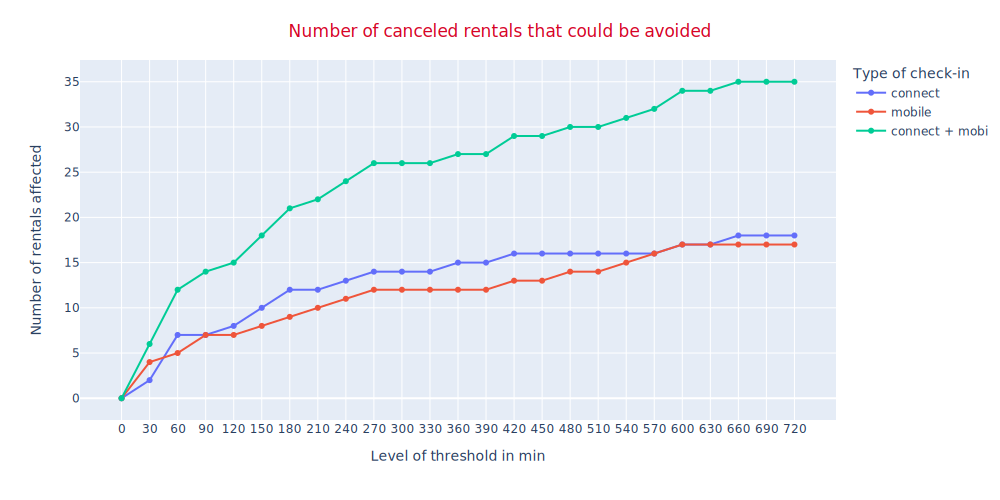

In [81]:
fig = px.line(df_temp_canceled, x = 'thresholds', y = 'nb_affected',
                markers = True,
                color = 'checkin_type'
            )
fig.update_layout(yaxis_title='Number of rentals affected',
                    xaxis_title='Level of threshold in min',
                    legend_title = 'Type of check-in',
                    title={'text': "Number of canceled rentals that could be avoided", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    autosize=False,
                    height=500,
                    width=1000,
                    title_font_color="#D50425")
fig.show()

In [82]:
# select only the cases with previous late checkout and that would be impacted by a threshold
df_temp_late = df_temp[df_temp['impacts'].str.contains('late_solved', case=False, regex=False)].copy()
df_temp_late['thresholds'] = df_temp_late['impacts'].apply(lambda x : x.split('_')[2])
df_temp_late

,checkin_type,impacts,nb_affected,thresholds
30,connect,late_solved_0,0.0,0
31,mobile,late_solved_0,0.0,0
32,connect + mobile,late_solved_0,0.0,0
39,connect,late_solved_30,22.0,30
40,mobile,late_solved_30,45.0,30
...,...,...,...,...
238,mobile,late_solved_690,139.0,690
239,connect + mobile,late_solved_690,207.0,690
246,connect,late_solved_720,68.0,720
247,mobile,late_solved_720,139.0,720


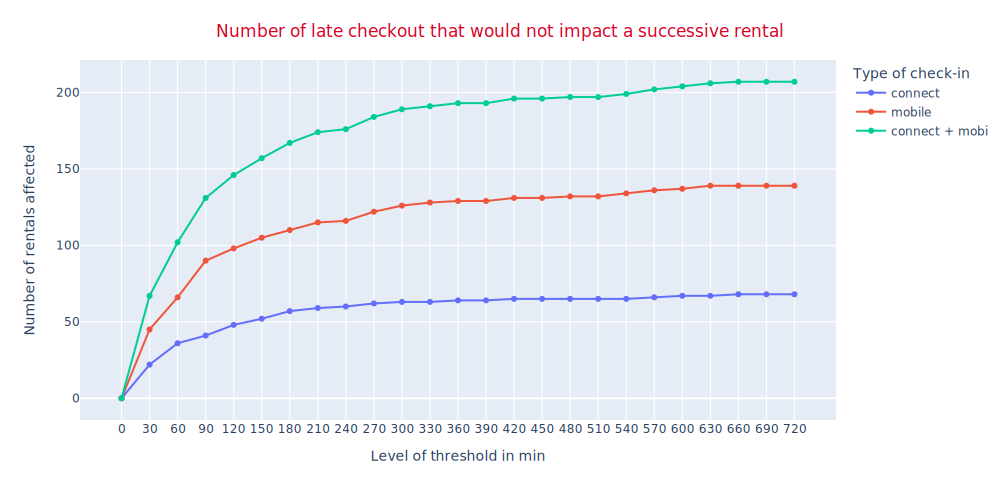

In [83]:
fig = px.line(df_temp_late, x = 'thresholds', y = 'nb_affected',
                markers = True,
                color = 'checkin_type'
            )
fig.update_layout(yaxis_title='Number of rentals affected',
                    xaxis_title='Level of threshold in min',
                    legend_title = 'Type of check-in',
                    title={'text': "Number of late checkout that would not impact a successive rental", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    autosize=False,
                    height=500,
                    width=1000,
                    title_font_color="#D50425")
fig.show()

In [84]:
# in terms of revenue, we assume that all the rentals are under an average price, that is the percentage of rentals affected = the percentage of revenue affected
df_temp_total['affected_revenue_in_percent_total_rentals'] = df_temp_total['nb_affected'] / dataset.shape[0] * 100
df_temp_total['affected_revenue_in_percent_successive_rentals'] = df_temp_total['nb_affected'] / df_previous.shape[0] * 100
df_temp_total

,checkin_type,impacts,nb_affected,thresholds,affected_revenue_in_percent_total_rentals,affected_revenue_in_percent_successive_rentals
24,connect,threshold_0,0.0,0,0.000000,0.000000
25,mobile,threshold_0,0.0,0,0.000000,0.000000
26,connect + mobile,threshold_0,0.0,0,0.000000,0.000000
33,connect,threshold_30,131.0,30,0.614735,7.115698
34,mobile,threshold_30,148.0,30,0.694510,8.039109
...,...,...,...,...,...,...
232,mobile,threshold_690,923.0,690,4.331300,50.135796
233,connect + mobile,threshold_690,1646.0,690,7.724073,89.407930
240,connect,threshold_720,755.0,720,3.542938,41.010320
241,mobile,threshold_720,956.0,720,4.486157,51.928300


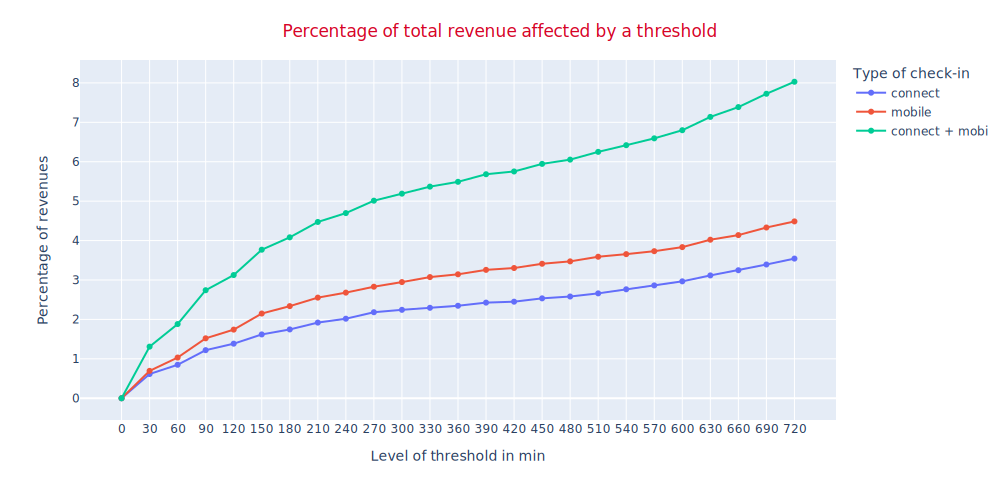

In [85]:
fig = px.line(df_temp_total, x = 'thresholds', y = 'affected_revenue_in_percent_total_rentals',
                markers = True,
                color = 'checkin_type'
            )
fig.update_layout(yaxis_title='Percentage of revenues',
                    xaxis_title='Level of threshold in min',
                    legend_title = 'Type of check-in',
                    title={'text': "Percentage of total revenue affected by a threshold", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    autosize=False,
                    height=500,
                    width=1000,
                    title_font_color="#D50425")
fig.show()

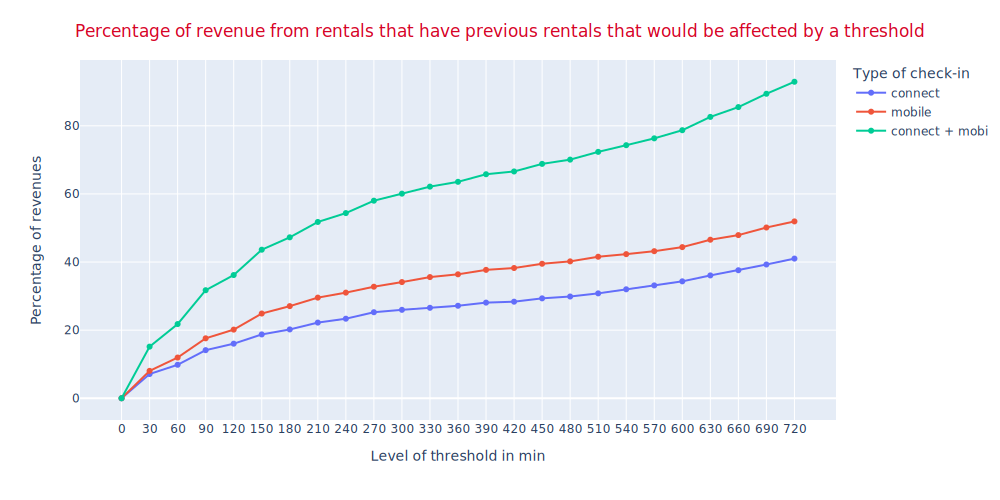

In [86]:
fig = px.line(df_temp_total, x = 'thresholds', y = 'affected_revenue_in_percent_successive_rentals',
                markers = True,
                color = 'checkin_type'
            )
fig.update_layout(yaxis_title='Percentage of revenues',
                    xaxis_title='Level of threshold in min',
                    legend_title = 'Type of check-in',
                    title={'text': "Percentage of revenue from rentals that have previous rentals that would be affected by a threshold", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    autosize=False,
                    height=500,
                    width=1000,
                    title_font_color="#D50425")
fig.show()

# Conclusion

From the last 5 graphs, we can propose a threshold of 180 minutes between 2 rentals, whatever the type of check-in.  
Indeed, in that case, 870 rentals would be impacted, which represents 4.1 % of the total revenue. It enables to avoid up to 21 canceled rentals (we do not know if these rentals were canceled due to the late previous checkout or for another reason).  
The trade-off seems pretty fair because if the threshold is increased, it would impact a lot more rentals (for example 1170 rentals with a threshold of 360 min, and 5.5% of total revenue) and could save only up to 27 canceled rentals.